<a href="https://colab.research.google.com/github/CrisMcode111/DI_Bootcamp/blob/main/w6_d1_xp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1 : What are Large Language Models (LLMs)?
1. Explain with your words what are LLMs and what they are designed for.

Imagine un LLM comme une personne qui a lu toute la bibliothèque du monde 📚.
Elle ne se souvient pas de chaque livre, mais elle a compris comment les mots, les phrases et les idées s’enchaînent.
Donc quand tu lui demandes quelque chose, elle invente une réponse nouvelle, basée sur tout ce qu’elle a appris.

One popular LLMs is GPT (Generative Pretrained Transformer) which is known for powerful text generation capabilities. We will implement it.

In [1]:
# Install necessary libraries
!pip install transformers matplotlib --quiet

# Import required libraries
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 2. Loading a pretrained model and tokenizer
model_name = "gpt2" # GPT-2 is used here for demonstration; can be replaced with models like "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)


print(f"\nModel '{model_name}' loaded successfully!")
print("""
GPT-2 is a causal language model, meaning it predicts the next word in a sequence.
It has been trained on a diverse dataset and can generate coherent, contextually relevant text.
""")
# on a un LLM operationel

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]


Model 'gpt2' loaded successfully!

GPT-2 is a causal language model, meaning it predicts the next word in a sequence. 
It has been trained on a diverse dataset and can generate coherent, contextually relevant text.



# Exercise 2 : Transformer Architecture and Tokenization
Explain with your own words the process of tokenization. Create a new variable text that the sentence of your choice.
Tokenize the input text
Visualize the tokenisation process.

La tokenisation c’est le fait de diviser un texte en petites unités appelées “tokens”, qui peuvent être des mots entiers, des parties de mots, des signes de ponctuation ou même des espaces codés. Chaque token est associé a un identifiant numerique intern , un ID. Chaque ID sera transformé en vector.

In [5]:
text = "Raw desserts without nuts are delicious and full of natural energy"

tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f"Original Text: {text}")
print(f"Tokens: {tokens}")
print(f"Token IDs: {token_ids}") # ca convertit les nombres en entiers



Original Text: Raw desserts without nuts are delicious and full of natural energy
Tokens: ['Raw', 'Ġdesserts', 'Ġwithout', 'Ġnuts', 'Ġare', 'Ġdelicious', 'Ġand', 'Ġfull', 'Ġof', 'Ġnatural', 'Ġenergy']
Token IDs: [27369, 47950, 1231, 14380, 389, 12625, 290, 1336, 286, 3288, 2568]


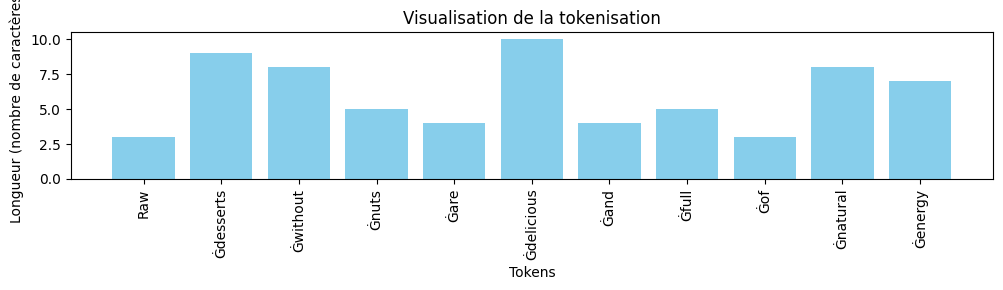

In [6]:
# Visualisation du processus de tokenisation
import matplotlib.pyplot as plt

# Créer un graphique avec la longueur de chaque token
plt.figure(figsize=(10, 3))
plt.bar(range(len(tokens)), [len(t) for t in tokens], color="skyblue")
plt.xticks(range(len(tokens)), tokens, rotation=90)
plt.title("Visualisation de la tokenisation")
plt.xlabel("Tokens")
plt.ylabel("Longueur (nombre de caractères)")
plt.tight_layout()
plt.show()

# ce grafique ne sert pas a analyser les valeurs exactes, mais que chaque token est associé à un entier.


# Exercise 3 : Understanding Token IDs and Special Prefixes
Print the ID of each tokens from text
What does special prefixes like ‘Ġ’ indicate ?

In [7]:
# 3. Afficher l'ID de chaque token du texte
for token, token_id in zip(tokens, token_ids):
    print(f"Token : {token:<15}  →  ID : {token_id}")


Token : Raw              →  ID : 27369
Token : Ġdesserts        →  ID : 47950
Token : Ġwithout         →  ID : 1231
Token : Ġnuts            →  ID : 14380
Token : Ġare             →  ID : 389
Token : Ġdelicious       →  ID : 12625
Token : Ġand             →  ID : 290
Token : Ġfull            →  ID : 1336
Token : Ġof              →  ID : 286
Token : Ġnatural         →  ID : 3288
Token : Ġenergy          →  ID : 2568


In [ ]:
The special prefix ‘Ġ’ (G with a dot) is used in the GPT-2 tokenizer and other Byte Pair Encoding (BPE) systems.

It indicates that there is a space before the word.

# Exercise 4 : Pretraining vs. Fine-Tuning
Explain with your own words the two phases of Pretraining and FineTuning in Transformers.





* Le pré-entraînement (ou pretraining) est la première phase.
Le modèle apprend le langage en général à partir d’un très grand nombre de textes (livres, articles, sites web…).
Il découvre comment les mots s’enchaînent, la grammaire, le sens des phrases.
C’est comme apprendre une langue sans sujet précis. Il est composé de 3 elements, l'apprentisage sur de tres grands corpus, la tache qui este autosupervisée, et permetre au model d'apprendre le vocabulaire, la grammaire.


* Le fine-tuning est la deuxième phase.
Le modèle est déjà capable de comprendre la langue, mais on l’entraîne à nouveau avec des données spécifiques pour un domaine particulier (médecine, finance, droit, etc.).
C’est comme une spécialisation après avoir appris la langue. Il est composé de : adaptation du model à une tache specifique sur un corpus plus petit mais maintenant il est adnoté, le processus est moins couteux.

En résumé :

Le pré-training apprend la langue en général,
le fine-tuning apprend un domaine ou une tâche spécifique.

# Exercise 5 : Generate Simple Text
Create a variable text with the sentence of your choice (another one)
The model generates text by predicting the next word sequentially, based on the given input text (prompt). Generate output using the model.

In [12]:
# 5. Generate simple text
input_text = "Healthy desserts made from fruits and seeds"

input_ids = tokenizer.encode(input_text, return_tensors='pt')

output = model.generate(
    input_ids,
    max_length=50,
    temperature=0.8, #combien de risque, de creativité, je veux
    top_k=50,   # choisi seumelent from les premiers k candidats
    top_p=0.95,  #nucleus sampling
    do_sample=True,
    pad_token_id=tokenizer.eos_token_id
)


# Décodage des IDs en texte
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print(f"Input: {input_text}")
print(f"Generated Output: {output_text}")


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Input: Healthy desserts made from fruits and seeds
Generated Output: Healthy desserts made from fruits and seeds have to contain less water to make them tastier. Some fruits and vegetables are rich in antioxidants and other nutritional elements, so they can be a tasty treat to include alongside your dessert menu.

How to


In [ ]:
# 2. Tokenize input text
tokens =
token_ids =

print(f"Original Text: {text}")
print(f"Tokens: {tokens}")
print(f"Token IDs: {token_ids}")

# 3. Visualizing the tokenization process
plt.figure(figsize=(10, 4))
plt.bar(tokens, token_ids, color="skyblue")
plt.xlabel(" ")
plt.ylabel(" ")
plt.title(" ")
plt.show()